# ⚡ 使用 GitHub 模型实现并发代理工作流（Python）

## 📋 高级并行处理教程

本笔记本展示了使用 Microsoft Agent Framework 的**并发工作流模式**。您将学习如何构建高性能的并行处理工作流，让多个 AI 代理同时执行任务，从而显著提高吞吐量并支持复杂的多线程业务流程。

## 🎯 学习目标

### 🚀 **并发处理基础**
- **代理并行执行**：同时运行多个代理以实现最大效率
- **工作流编排**：协调并发操作，同时保持数据一致性
- **性能优化**：通过并行处理实现显著的速度提升
- **资源管理**：在并发操作中高效利用 AI 模型资源

### 🏗️ **高级并发模式**
- **分叉-合并处理**：将工作分配给多个代理并合并结果
- **流水线并行**：重叠执行阶段以实现持续的吞吐量
- **负载均衡**：将工作均匀分配到可用的代理资源
- **同步点**：在关键工作流阶段协调并发代理

### 🏢 **企业级并发应用**
- **高容量文档处理**：同时处理多个文档
- **实时内容分析**：并发分析传入的数据流
- **批处理优化**：最大化大规模操作的吞吐量
- **多模态分析**：并行处理不同类型的内容（文本、图像、数据）

## ⚙️ 前提条件与设置

### 📦 **所需依赖项**

安装支持并发工作流功能的 Agent Framework：

```bash
pip install agent-framework-core -U
```

### 🔑 **GitHub 模型配置**

**环境设置（.env 文件）：**
```env
GITHUB_TOKEN=your_github_personal_access_token
GITHUB_ENDPOINT=https://models.inference.ai.azure.com
GITHUB_MODEL_ID=gpt-4o-mini
```

**并发处理注意事项：**
- **速率限制**：监控 GitHub 模型 API 并发请求的速率限制
- **资源使用**：考虑多个并发代理的内存和 CPU 使用情况
- **错误处理**：为并行操作实现强大的错误恢复机制

### 🏗️ **并发工作流架构**

```mermaid
graph TD
    A[Workflow Start] --> B[Concurrent Execution]
    B --> C[Agent Pool 1]
    B --> D[Agent Pool 2]
    B --> E[Agent Pool 3]
    C --> F[Result Aggregation]
    D --> F
    E --> F
    F --> G[Final Output]
    
    H[GitHub Models API] --> C
    H --> D
    H --> E
```

**主要优势：**
- **⚡ 性能**：通过并行执行实现显著的速度提升
- **📈 可扩展性**：处理增加的工作负载而无需成比例增加时间
- **🔄 效率**：更好地利用可用的计算资源
- **🎯 吞吐量**：在相同时间内处理更多工作

## 🎨 **并发工作流设计模式**

### 🔍 **研究与分析流水线**
```
Research Task → Parallel Research Agents → Content Synthesis → Quality Review
```

### 📊 **数据处理工作流**
```
Input Data → Concurrent Processing Agents → Result Aggregation → Final Report
```

### 🎭 **内容创建流水线**
```
Content Brief → Parallel Content Generators → Review & Merge → Final Content
```

### 🔄 **多阶段处理**
```
Input → Stage 1 (Concurrent) → Stage 2 (Concurrent) → Stage 3 (Sequential) → Output
```

## 🏢 **企业级性能优势**

### ⚡ **吞吐量优化**
- **并行执行**：多个代理同时工作
- **资源利用**：最大化利用可用的 AI 模型容量
- **时间缩短**：显著减少总处理时间
- **可扩展架构**：根据需要轻松添加更多并发代理

### 🛡️ **可靠性与弹性**
- **容错性**：单个代理故障不会停止整个工作流
- **错误隔离**：一个并发分支的问题不会影响其他分支
- **优雅降级**：即使代理容量减少，系统仍能继续运行
- **恢复机制**：为失败的操作提供自动重试和错误处理

### 📊 **监控与可观测性**
- **并发执行跟踪**：监控所有并行操作的进度
- **性能指标**：衡量速度提升和效率收益
- **资源使用分析**：优化并发代理分配
- **瓶颈识别**：发现并解决性能限制

让我们一起构建高性能的并发 AI 工作流吧！🚀


In [1]:
! pip install agent-framework-core -U

In [2]:
import os
from typing import Any

from agent_framework import ChatMessage, ConcurrentBuilder,WorkflowViz
from agent_framework.openai import OpenAIChatClient

In [3]:
chat_client = OpenAIChatClient(base_url=os.environ.get("GITHUB_ENDPOINT"), api_key=os.environ.get("GITHUB_TOKEN"), model_id="gpt-4o" )

In [4]:
ResearcherAgentName = "Researcher-Agent"
ResearcherAgentInstructions = "You are my travel researcher, working with me to analyze the destination, list relevant attractions, and make detailed plans for each attraction."

In [5]:
PlanAgentName = "Plan-Agent"
PlanAgentInstructions = "You are my travel planner, working with me to create a detailed travel plan based on the researcher's findings."

In [6]:
research_agent   = chat_client.create_agent(
        instructions=(
           ResearcherAgentInstructions
        ),
        name=ResearcherAgentName,
    )

plan_agent = chat_client.create_agent(
        instructions=(
            PlanAgentInstructions
        ),
        name=PlanAgentName,
    )

In [7]:
workflow = ConcurrentBuilder().participants([research_agent, plan_agent]).build()

In [8]:
print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  dispatcher["dispatcher (Start)"];
  Researcher_Agent["Researcher-Agent"];
  Plan_Agent["Plan-Agent"];
  aggregator["aggregator"];
  fan_in__aggregator__69d73de8((fan-in))
  Plan_Agent --> fan_in__aggregator__69d73de8;
  Researcher_Agent --> fan_in__aggregator__69d73de8;
  fan_in__aggregator__69d73de8 --> aggregator;
  dispatcher --> Researcher_Agent;
  dispatcher --> Plan_Agent;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "dispatcher" [fillcolor=lightgreen, label="dispatcher\n(Start)"];
  "Researcher-Agent" [label="Researcher-Agent"];
  "Plan-Agent" [label="Plan-Agent"];
  "aggregator" [label="aggregator"];

  "fan_in::aggregator::69d73de8" [shape=ellipse, fillcolor=lightgoldenrod, label="fan-in"];
  "Plan-Agent" -> "fan_in::aggregator::69d73de8";
  "Researcher-Agent" -> "fan_in::aggregator::69d73de8";
  "fan_in::aggre

Attempting to display SVG file at: C:\Users\kinfeylo\AppData\Local\Temp\tmpoq68cqjk.svg


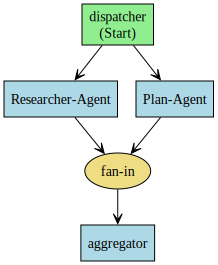

In [9]:
from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")

In [10]:
events = await workflow.run("Plan a trip to Seattle in December")
outputs = events.get_outputs()

In [11]:
if outputs:
        print("===== Final Aggregated Conversation (messages) =====")
        for output in outputs:
            messages: list[ChatMessage] | Any = output
            for i, msg in enumerate(messages, start=1):
                name = msg.author_name if msg.author_name else "user"
                print(f"{'-' * 60}\n\n{i:02d} [{name}]:\n{msg.text}")

===== Final Aggregated Conversation (messages) =====
------------------------------------------------------------

01 [user]:
Plan a trip to Seattle in December
------------------------------------------------------------

02 [Researcher-Agent]:
Seattle is a wonderful place to visit in December, with vibrant winter festivities, seasonal attractions, and gorgeous views of the Pacific Northwest. Despite the chilly weather and occasional rain, Seattle’s charm shines through its indoor and outdoor attractions. Here's a detailed plan for your trip:

---

### **Destination Overview: Seattle in December**
- **Weather**: Expect average highs of around 47°F (8°C) and lows near 37°F (3°C). Rain is frequent, so bring waterproof clothing.
- **Packing List**:
  - Warm layers (sweaters, coats, gloves, and hats).
  - Comfortable walking shoes (water-resistant is ideal).
  - Umbrella or rain jacket.

---

### **Day 1: Exploring Downtown Seattle**
#### **Morning**: **Pike Place Market**
- One of Seattl


---

**免责声明**：  
本文档使用AI翻译服务 [Co-op Translator](https://github.com/Azure/co-op-translator) 进行翻译。尽管我们努力确保翻译的准确性，但请注意，自动翻译可能包含错误或不准确之处。原始语言的文档应被视为权威来源。对于关键信息，建议使用专业人工翻译。我们不对因使用此翻译而产生的任何误解或误读承担责任。
